In [ ]:
# K-Means on text: Find similar products (e.g. "Fries", "Home fries", "Bacon fries")

In [ ]:
# K-Means on data bought together to find cuisines

In [ ]:
import pandas as pd

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rootFolder = "./drive/MyDrive/DataScience/FutureFoodsBusinessCase/"

In [ ]:
df = pd.read_csv(rootFolder+"data/filtered_data.csv").drop("index",axis=1)
df.head()

,date,hour,name,requested_orders,accepted_orders,completed_orders_ofo_state,first_time_orders,first_time_orders_promo,returning_orders,returning_orders_promo,order_issues,avg_prep_time,avg_rating,total_eater_spend,total_eater_spend__1
0,2022-02-17,15,Tater Tots,1,1,1,0,0,1,0,NaN,NaN,NaN,23.25,0.00
1,2022-02-21,19,2 Protein Poke Bowl,3,3,3,2,2,1,0,NaN,NaN,NaN,130.00,-43.50
2,2022-02-16,9,Bagel with Lox,7,7,7,6,5,1,1,1.0,51.0,NaN,219.50,-47.22
3,2022-02-18,19,Spicy Fried Rice,1,1,1,1,1,0,0,NaN,667.0,NaN,23.99,-5.00
4,2022-02-25,12,Tonkotsu Pork Ramen,1,1,1,1,1,0,0,NaN,NaN,NaN,53.57,-3.00


## Part 1: Find similar products clutering names

In [ ]:
text1 = df["name"]

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
import string

Remove unrelevant words such as "the", "a", etc.

In [ ]:
text2 = [remove_stopwords(x)\
        .translate(str.maketrans('','',string.punctuation))\
        .translate(str.maketrans('','',string.digits))\
        for x in text1]

In [ ]:
text2[:5]

['Tater Tots',
 ' Protein Poke Bowl',
 'Bagel Lox',
 'Spicy Fried Rice',
 'Tonkotsu Pork Ramen']

Stemming words to make common patterns

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

text3 = pd.Series([stemSentence(x) for x in text2])

In [ ]:
text3[:5]

0              tater tot
1      protein poke bowl
2              bagel lox
3         spici fri rice
4    tonkotsu pork ramen
dtype: object

In [ ]:
df["new_name"] = text3

In [ ]:
df[["name", "new_name"]].sample(5)

,name,new_name
90820,Fettuccine,fettuccin
62821,Coke,coke
14886,Vegetable Pizza,veget pizza
59729,Apple Bowl,appl bowl
68725,Deep Space Sausage Pizza,deep space sausag pizza


Vectorize all words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text3)

In [ ]:
matrix = pd.concat([text1, pd.DataFrame(X_cv.toarray(), columns=vectorizer_cv.get_feature_names_out())],axis=1)

In [ ]:
matrix.sample(5)

,name,about,abund,acai,af,after,agedashi,agent,aglio,agua,...,할배곰의,핸드폰하고픈날엔,헤이즐넛라떼,헤이즐넛아메리카노,회식에,회의실에서,회의쟁이에이드,회장님라떼,휴가,흑임자라떼
7179,Cheese Fries,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10686,Collard Greens,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66543,Chicken and Waffles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28581,"Bacon, Egg and Cheese Bagel",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Oatmeal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(matrix.columns)

1967

In [ ]:
import numpy as np

In [ ]:
sse={}
for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_cv)
    sse[k] = kmeans.inertia_

In [ ]:
import matplotlib.pyplot as plt

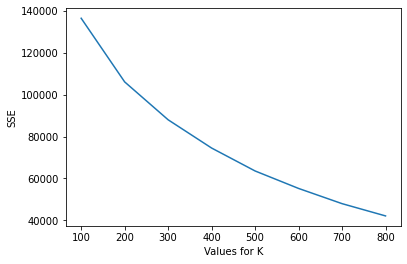

In [ ]:
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

K chosen: 200

In [ ]:
kmeans = KMeans(n_clusters=200, max_iter=1000)
kmeans.fit(X_cv)

KMeans(max_iter=1000, n_clusters=200)

In [ ]:
result = pd.concat([text1,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names_out())],axis=1)
result['cluster'] = kmeans.predict(X_cv)

In [ ]:
result

,name,about,abund,acai,af,after,agedashi,agent,aglio,agua,...,핸드폰하고픈날엔,헤이즐넛라떼,헤이즐넛아메리카노,회식에,회의실에서,회의쟁이에이드,회장님라떼,휴가,흑임자라떼,cluster
0,Tater Tots,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,113
1,2 Protein Poke Bowl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,164
2,Bagel with Lox,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117
3,Spicy Fried Rice,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
4,Tonkotsu Pork Ramen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97394,Spicy Tonkotsu Pork Ramen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,106
97395,Spaghetti Carbonara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
97396,Diet Pepsi (bottle),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101
97397,Double Smash Cheeseburger Combo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50


In [ ]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='name' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [ ]:
result_labelled["label"].value_counts()

                        13155
chicken                  2776
breakfast burrito        2764
chees                    2686
fri                      2146
                        ...  
rockaway                   89
french platter toast       87
egg two                    84
bull oz red                74
noodl vegan                62
Name: label, Length: 174, dtype: int64

In [ ]:
result_labelled[["name", "label"]].sample(5)

,name,label
32588,Build Your Own Poke Bowl,bowl own your
33277,White Burrito Burracho,burrito
96909,Combo Rice Bowl,bowl rice
20422,Turkey Club,turkey
8092,Pepperoni Pizza,pepperoni pizza


In [ ]:
result_labelled["label"].iloc[52338]

'wing'

In [ ]:
df["name_clustered"]=result_labelled["label"]
df = df.replace("", np.nan)

In [ ]:
from google.colab import files

df.to_csv('clustered_names.csv', encoding = 'utf-8') 
files.download('clustered_names.csv')

## Part 2: Cluster by cuisine

In [ ]:
kmeans = KMeans(n_clusters=50, max_iter=1000)
kmeans.fit(X_cv)

KMeans(max_iter=1000, n_clusters=50)

In [ ]:
result = pd.concat([text1,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names_out())],axis=1)
result['cluster'] = kmeans.predict(X_cv)

In [ ]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='name' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [ ]:
len(result_labelled)

97399

In [ ]:
result_labelled["label"].value_counts()

                     36044
chicken               4981
the                   4311
breakfast burrito     3581
rice                  2928
cheesesteak           2889
egg                   2680
wing                  2662
fri                   2606
burrito               1908
salad                 1903
chees grill           1868
chicken wing          1775
roll                  1750
toast                 1552
chees                 1521
breakfast             1453
chees mac             1422
your                  1395
veget                 1363
ramen                 1355
bottl                 1349
bacon                 1320
chicken fri           1296
taco                  1255
plate                 1042
chip                   966
pita                   823
curri                  820
meat                   784
chees egg sausag       741
quesadilla             736
lamb                   726
hot                    720
af                     672
chees fri              641
garlic parmesan        502
b

In [ ]:
df["cuisine_clustered"]=result_labelled["label"]
df = df.replace("", np.nan)

In [ ]:
len(df[(df["name_clustered"].notna()) & (df["cuisine_clustered"].notna())])/len(df)

0.6025421205556525

60.25% of data were removed from the clustering.

In [ ]:
from google.colab import files

df.to_csv('clustered_cuisines.csv', encoding = 'utf-8') 
files.download('clustered_cuisines.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>